In [1]:
###seguno kpi

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format
random_state = 42
from datetime import date
import plotly.graph_objects as go
from plotly import offline as pyoff



from datetime import datetime, date, time, timedelta
import calendar

In [3]:
df=pd.read_csv('C:/Users/evive/Downloads/Nico y Juan/easyMoney/df_banc_rev.csv')

In [4]:
df= df.sample(n=600000, random_state=42)

In [5]:
df['entry_date'] = pd.to_datetime(df['entry_date'])
df['Day_entry_date'] = df['entry_date'].dt.day
df['Year_entry_date'] = df['entry_date'].dt.year
df['Month_entry_date'] = df['entry_date'].dt.month

In [6]:
df['pk_partition'] = pd.to_datetime(df['pk_partition'])
df['Day_pk_partition'] = df['pk_partition'].dt.day
df['Year_pk_partition'] = df['pk_partition'].dt.year
df['Month_pk_partition'] = df['pk_partition'].dt.month

In [7]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [8]:
df.drop('entry_date', inplace=True, axis=1)

In [9]:
df.drop('pk_partition', inplace=True, axis=1)

In [10]:
print("Tamaño del conjunto de datos:  %d" % df.shape[0])
print("Número de variables: %d" % df.shape[1])
# Visualiza las primeras instancias
df.head()

Tamaño del conjunto de datos:  600000
Número de variables: 70


,pk_cid,active_customer,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,...,revenue_payroll,revenue_payroll_account,revenue_total,unidades_vendidas_total,Day_entry_date,Year_entry_date,Month_entry_date,Day_pk_partition,Year_pk_partition,Month_pk_partition
5361210,1445664,0.00,0,0,0,0,0,0,0,0.00,...,0.00,0,0.00,0.00,10,2018,9,28,2018,11
3165719,1249034,0.00,0,0,0,0,0,0,0,0.00,...,0.00,0,10.00,1.00,18,2017,3,28,2018,6
2934038,1227306,0.00,0,0,0,0,0,0,0,0.00,...,0.00,0,10.00,1.00,29,2016,11,28,2018,1
3876044,1308698,1.00,0,0,0,0,0,0,0,0.00,...,0.00,0,70.00,2.00,16,2017,9,28,2018,9
5040011,1407558,0.00,0,0,0,0,0,0,0,0.00,...,0.00,0,10.00,1.00,17,2018,7,28,2019,3


In [11]:
# Tamaño del conjunto de entrenamiento
training_size = int(len(df)*0.85)
# Desordena los datos (esto es muy importante).
df = df.sample(frac=1, random_state=0).reset_index(drop=True)
# Copia los datos de test.
df_churn_new = df.iloc[training_size:].copy()
# Copia los datos para el entrenamiento del modelo.
df = df.iloc[:training_size].copy()

In [12]:
from sklearn.model_selection import train_test_split
# Tamaño del conjunto de entrenamiento
training_size = int(len(df)*0.85)
# Rebalancea los datos en el holdout
y = df["active_customer"]
X = df.drop("active_customer", axis=1)

X_train, X_test, y_train, y_test = train_test_split(
                                         X,
                                         y,
                                         train_size=training_size,
                                         random_state=42,
                                         shuffle=True,
                                         stratify=y)

In [13]:
print("Proporción True / False del conjunto de entremaniento: ", y_train.value_counts()[1]/y_train.value_counts()[0])
print("Proporción True / False del conjunto de validación: ", y_test.value_counts()[1]/y_test.value_counts()[0])

Proporción True / False del conjunto de entremaniento:  0.6770150293042418
Proporción True / False del conjunto de validación:  0.6770063792007366


In [14]:
df = X_train.copy()
df["active_customer"] = y_train
df_churn_new = X_test.copy()
df_churn_new["active_customer"] = y_test

In [15]:
print("Tamaño del conjunto de datos disponibles: ", len(df))
print("Tamaño del conjunto de nuevos datos: ", len(df_churn_new))

Tamaño del conjunto de datos disponibles:  433500
Tamaño del conjunto de nuevos datos:  76500


In [16]:
# Lista de funciones aplicadas en el preprocesamiento
churn_data_preprocessing = []

# Características que serán consideradas categóricas y numéricas en el pipeline
cat_features = []
num_features = []

Clases:  [1. 0.]
El porcentaje de muestras positivas es 0.403702


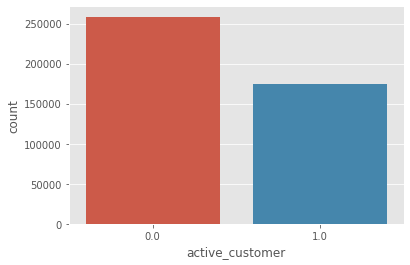

In [17]:
print("Clases: ", df['active_customer'].unique())

#
# COMPLETAR
#
sns.countplot("active_customer", data=df)

print("El porcentaje de muestras positivas es %f" % (sum(df['active_customer']) / df.shape[0]))

In [18]:
def churn_binarize_class(df):
    # COMPLETAR
    df["active_customer"] = df["active_customer"].astype(int)
    return df.T

# Comprueba si la función está bien
display(churn_binarize_class(df.head(10).copy()))

,240364,165430,331302,203878,489975,363417,356164,476398,505150,196627
pk_cid,"1,193,666.00","1,186,146.00","1,031,706.00","1,095,766.00","1,062,104.00","1,412,576.00","1,112,333.00","1,005,226.00","1,036,043.00","1,197,631.00"
short_term_deposit,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
loans,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mortgage,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
funds,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
securities,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
long_term_deposit,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
credit_card,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
payroll,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
pension_plan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [19]:
df.dtypes

pk_cid                          int64
short_term_deposit              int64
loans                           int64
mortgage                        int64
funds                           int64
securities                      int64
long_term_deposit               int64
credit_card                     int64
payroll                       float64
pension_plan                  float64
payroll_account                 int64
emc_account                     int64
debit_card                      int64
em_account_p                    int64
em_acount                       int64
region_code                   float64
gender                          int64
age                             int64
deceased                        int64
salary                        float64
entry_channel_KHE               int64
entry_channel_KFC               int64
entry_channel_KHQ               int64
entry_channel_KAT               int64
entry_channel_KHK               int64
entry_channel_KHM               int64
entry_channe

In [20]:
numeric_types = ["int16", "int32", "int64", "float16", "float32", "float64"]
cat_df_columns = list(df.select_dtypes(exclude=numeric_types).columns.values) # COMPLETAR
num_df_columns = list(df.select_dtypes(include=numeric_types).columns.values) # COMPLETAR

print('Categóricas: ',cat_df_columns)
print('Numéricas: ',num_df_columns)

Categóricas:  []
Numéricas:  ['pk_cid', 'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'emc_account', 'debit_card', 'em_account_p', 'em_acount', 'region_code', 'gender', 'age', 'deceased', 'salary', 'entry_channel_KHE', 'entry_channel_KFC', 'entry_channel_KHQ', 'entry_channel_KAT', 'entry_channel_KHK', 'entry_channel_KHM', 'entry_channel_KHN', 'entry_channel_KFA', 'entry_channel_KHD', 'entry_channel_RED', 'entry_channel_KHL', 'entry_channel_KHF', 'entry_channel_KHO', 'entry_channel_KAZ', 'entry_channel_KHC', 'entry_channel_KBG', 'entry_channel_Others', 'segment_01 - TOP', 'segment_02 - PARTICULARES', 'segment_03 - UNIVERSITARIO', 'country_id_ES', 'country_id_GB', 'country_id_FR', 'country_id_DE', 'country_id_US', 'country_id_CH', 'country_id_Others', 'em_acount_revenue', 'em_account_p_revenue', 'revenue_emc_account', 'revenue_funds', 'revenue_loans', 'revenue_long_term_deposit', 'revenu

In [21]:
print("Imprimiendo el número de valores de cada variable numérica\n-------------------------------------------------")
for column in num_df_columns:
    print(f"Número de valores de {column.upper()}: {len(df[column].value_counts())}")

Imprimiendo el número de valores de cada variable numérica
-------------------------------------------------
Número de valores de PK_CID: 274174
Número de valores de SHORT_TERM_DEPOSIT: 2
Número de valores de LOANS: 2
Número de valores de MORTGAGE: 2
Número de valores de FUNDS: 2
Número de valores de SECURITIES: 2
Número de valores de LONG_TERM_DEPOSIT: 2
Número de valores de CREDIT_CARD: 2
Número de valores de PAYROLL: 2
Número de valores de PENSION_PLAN: 2
Número de valores de PAYROLL_ACCOUNT: 2
Número de valores de EMC_ACCOUNT: 2
Número de valores de DEBIT_CARD: 2
Número de valores de EM_ACCOUNT_P: 2
Número de valores de EM_ACOUNT: 2
Número de valores de REGION_CODE: 52
Número de valores de GENDER: 3
Número de valores de AGE: 103
Número de valores de DECEASED: 2
Número de valores de SALARY: 178799
Número de valores de ENTRY_CHANNEL_KHE: 2
Número de valores de ENTRY_CHANNEL_KFC: 2
Número de valores de ENTRY_CHANNEL_KHQ: 2
Número de valores de ENTRY_CHANNEL_KAT: 2
Número de valores de

In [22]:
df['region_code'].value_counts()

28.00    85619
8.00     43857
46.00    26006
30.00    21717
41.00    21384
15.00    18430
29.00    13782
36.00    12870
3.00     12420
11.00    11700
33.00     9775
50.00     9552
35.00     8904
6.00      8901
47.00     8544
18.00     7475
45.00     7312
37.00     6780
10.00     6021
14.00     5407
2.00      5295
21.00     5283
39.00     5137
13.00     5049
12.00     4998
7.00      4613
32.00     4026
43.00     3886
27.00     3759
17.00     3628
25.00     3406
9.00      3369
16.00     2683
48.00     2553
24.00     2552
26.00     2479
4.00      2422
23.00     2275
31.00     2223
49.00     2188
38.00     2095
34.00     2039
19.00     1968
40.00     1567
5.00      1553
22.00     1528
20.00     1389
44.00      929
1.00       927
42.00      640
51.00      220
52.00      189
Name: region_code, dtype: int64

In [23]:
df['region_code'].fillna(value=0,inplace=True)

In [24]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433500 entries, 240364 to 68225
Data columns (total 70 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   pk_cid                      433500 non-null  int64  
 1   short_term_deposit          433500 non-null  int64  
 2   loans                       433500 non-null  int64  
 3   mortgage                    433500 non-null  int64  
 4   funds                       433500 non-null  int64  
 5   securities                  433500 non-null  int64  
 6   long_term_deposit           433500 non-null  int64  
 7   credit_card                 433500 non-null  int64  
 8   payroll                     433500 non-null  float64
 9   pension_plan                433500 non-null  float64
 10  payroll_account             433500 non-null  int64  
 11  emc_account                 433500 non-null  int64  
 12  debit_card                  433500 non-null  int64  
 13  em_account

In [25]:
num_features.extend(num_df_columns)


print("Numéricas: ",num_features)

Numéricas:  ['pk_cid', 'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'emc_account', 'debit_card', 'em_account_p', 'em_acount', 'region_code', 'gender', 'age', 'deceased', 'salary', 'entry_channel_KHE', 'entry_channel_KFC', 'entry_channel_KHQ', 'entry_channel_KAT', 'entry_channel_KHK', 'entry_channel_KHM', 'entry_channel_KHN', 'entry_channel_KFA', 'entry_channel_KHD', 'entry_channel_RED', 'entry_channel_KHL', 'entry_channel_KHF', 'entry_channel_KHO', 'entry_channel_KAZ', 'entry_channel_KHC', 'entry_channel_KBG', 'entry_channel_Others', 'segment_01 - TOP', 'segment_02 - PARTICULARES', 'segment_03 - UNIVERSITARIO', 'country_id_ES', 'country_id_GB', 'country_id_FR', 'country_id_DE', 'country_id_US', 'country_id_CH', 'country_id_Others', 'em_acount_revenue', 'em_account_p_revenue', 'revenue_emc_account', 'revenue_funds', 'revenue_loans', 'revenue_long_term_deposit', 'revenue_mortgage', 'rev

In [26]:
from seaborn import kdeplot

C:\Users\evive\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\evive\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\evive\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.



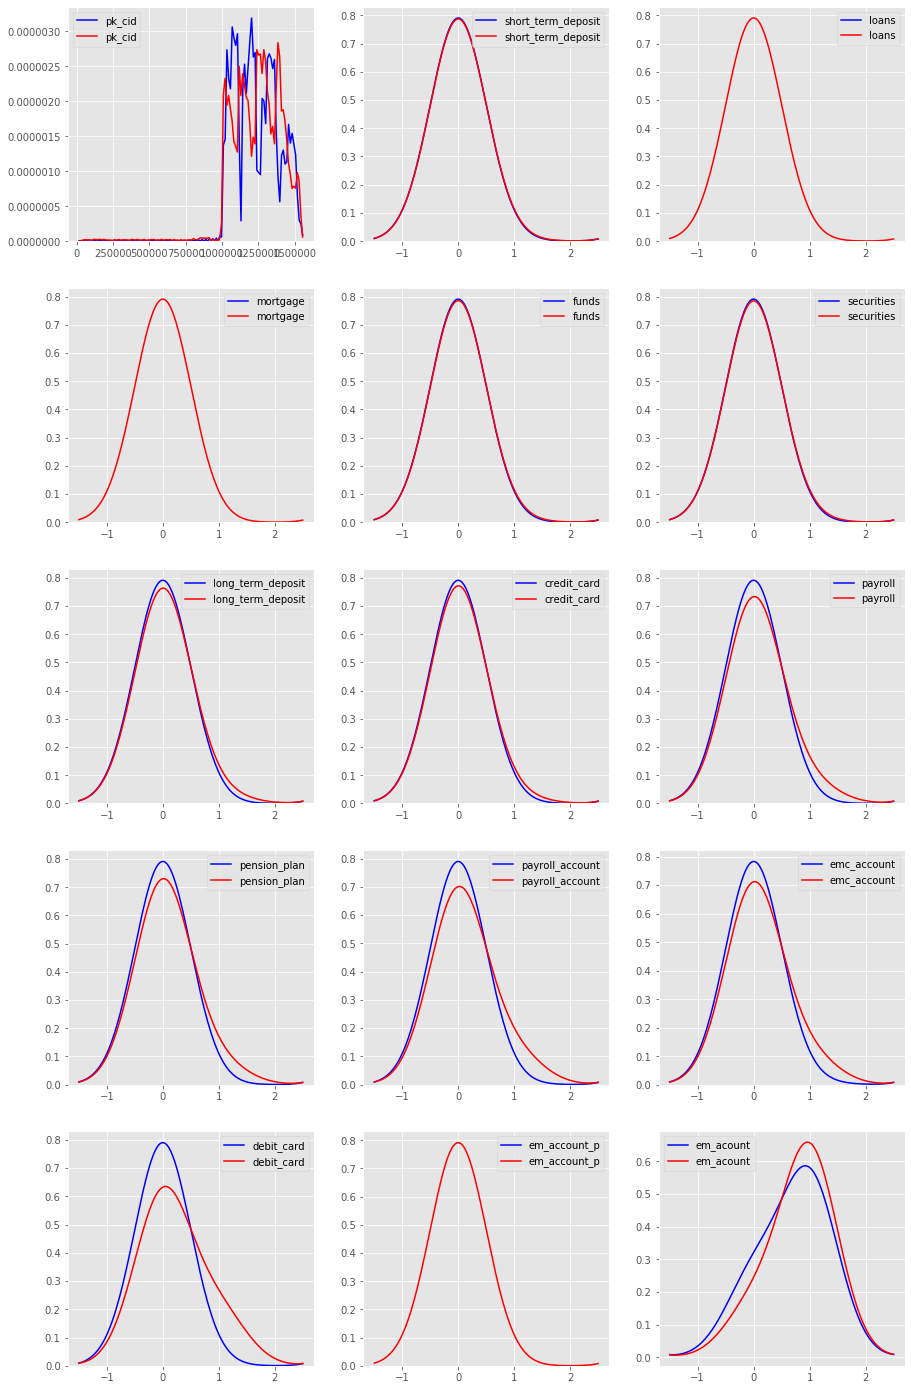

In [27]:
fig, axs = plt.subplots(5,3, figsize=(15, 25))

for col, ax in enumerate(axs.flatten()):
    col_name = num_features[col]
    #
    # COMPLETAR
    #
    sns.kdeplot(df[col_name].loc[df.active_customer == 0], ax=ax, color = 'b',bw= 0.5)
    sns.kdeplot(df[col_name].loc[df.active_customer == 1], ax=ax, color ='r',bw= 0.5)
    plt.plot()

In [28]:
num_features1 = ['region_code', 'gender', 'age', 'deceased', 'salary', 'entry_channel_KHE', 'entry_channel_KFC', 'entry_channel_KHQ', 'entry_channel_KAT', 'entry_channel_KHL', 'entry_channel_KHF', 'segment_01 - TOP', 'segment_02 - PARTICULARES', 'segment_03 - UNIVERSITARIO', 'country_id_ES']

In [29]:
col_name1 = num_features1[col]

[]

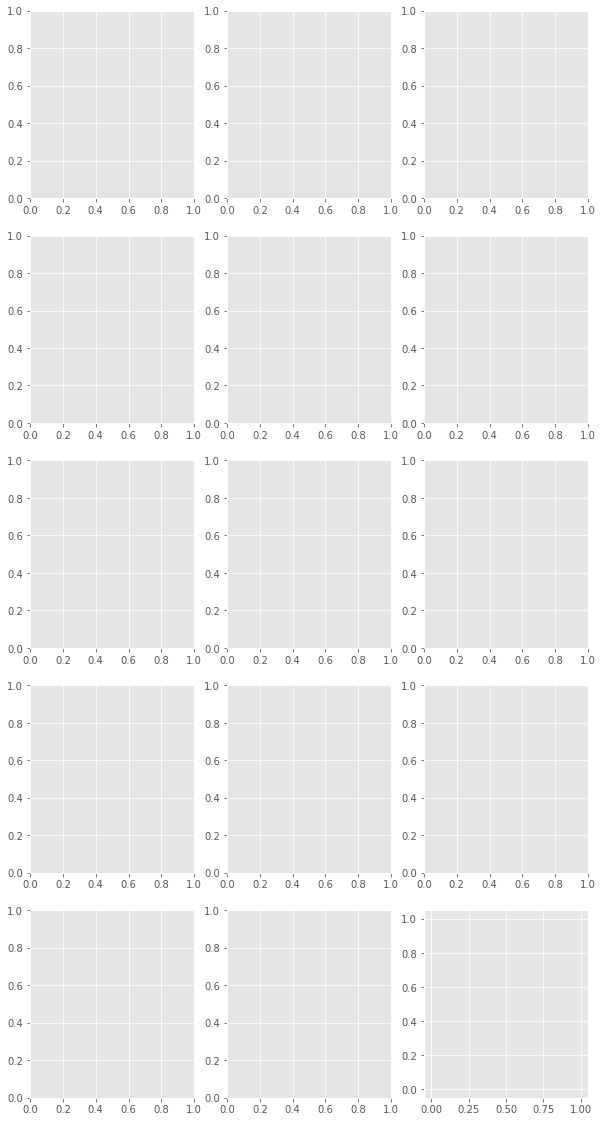

In [30]:

f, ax = plt.subplots(5, 3, figsize=(10, 20))

for col_name1, ax in enumerate(axs.flatten()):
    col_name1 = num_features1[col]

    #
    # COMPLETAR
    #
sns.kdeplot(df[col_name1].loc[df.active_customer == 0], ax=ax, color ='b',bw= 0.5)
sns.kdeplot(df[col_name1].loc[df.active_customer == 1], ax=ax, color ='r',bw= 0.5)
plt.plot()

In [31]:
print("Variables numéricas: ")
print(num_features)
print("\nVariables categóricas")
print(cat_features)

df.head()

Variables numéricas: 
['pk_cid', 'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'emc_account', 'debit_card', 'em_account_p', 'em_acount', 'region_code', 'gender', 'age', 'deceased', 'salary', 'entry_channel_KHE', 'entry_channel_KFC', 'entry_channel_KHQ', 'entry_channel_KAT', 'entry_channel_KHK', 'entry_channel_KHM', 'entry_channel_KHN', 'entry_channel_KFA', 'entry_channel_KHD', 'entry_channel_RED', 'entry_channel_KHL', 'entry_channel_KHF', 'entry_channel_KHO', 'entry_channel_KAZ', 'entry_channel_KHC', 'entry_channel_KBG', 'entry_channel_Others', 'segment_01 - TOP', 'segment_02 - PARTICULARES', 'segment_03 - UNIVERSITARIO', 'country_id_ES', 'country_id_GB', 'country_id_FR', 'country_id_DE', 'country_id_US', 'country_id_CH', 'country_id_Others', 'em_acount_revenue', 'em_account_p_revenue', 'revenue_emc_account', 'revenue_funds', 'revenue_loans', 'revenue_long_term_deposit', 'revenue_mortg

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,...,revenue_payroll_account,revenue_total,unidades_vendidas_total,Day_entry_date,Year_entry_date,Month_entry_date,Day_pk_partition,Year_pk_partition,Month_pk_partition,active_customer
240364,1193666,0,0,0,0,0,0,0,0.00,0.00,...,0,80.00,3.00,9,2016,10,28,2019,3,1.00
165430,1186146,0,0,0,0,0,0,0,0.00,0.00,...,0,10.00,1.00,30,2016,9,28,2018,10,0.00
331302,1031706,0,0,0,0,0,0,0,0.00,0.00,...,0,10.00,1.00,25,2015,7,28,2018,11,0.00
203878,1095766,0,0,0,0,0,0,0,0.00,0.00,...,0,10.00,1.00,5,2015,11,28,2018,3,1.00
489975,1062104,0,0,0,0,0,0,0,0.00,0.00,...,0,10.00,1.00,18,2015,9,28,2019,1,0.00


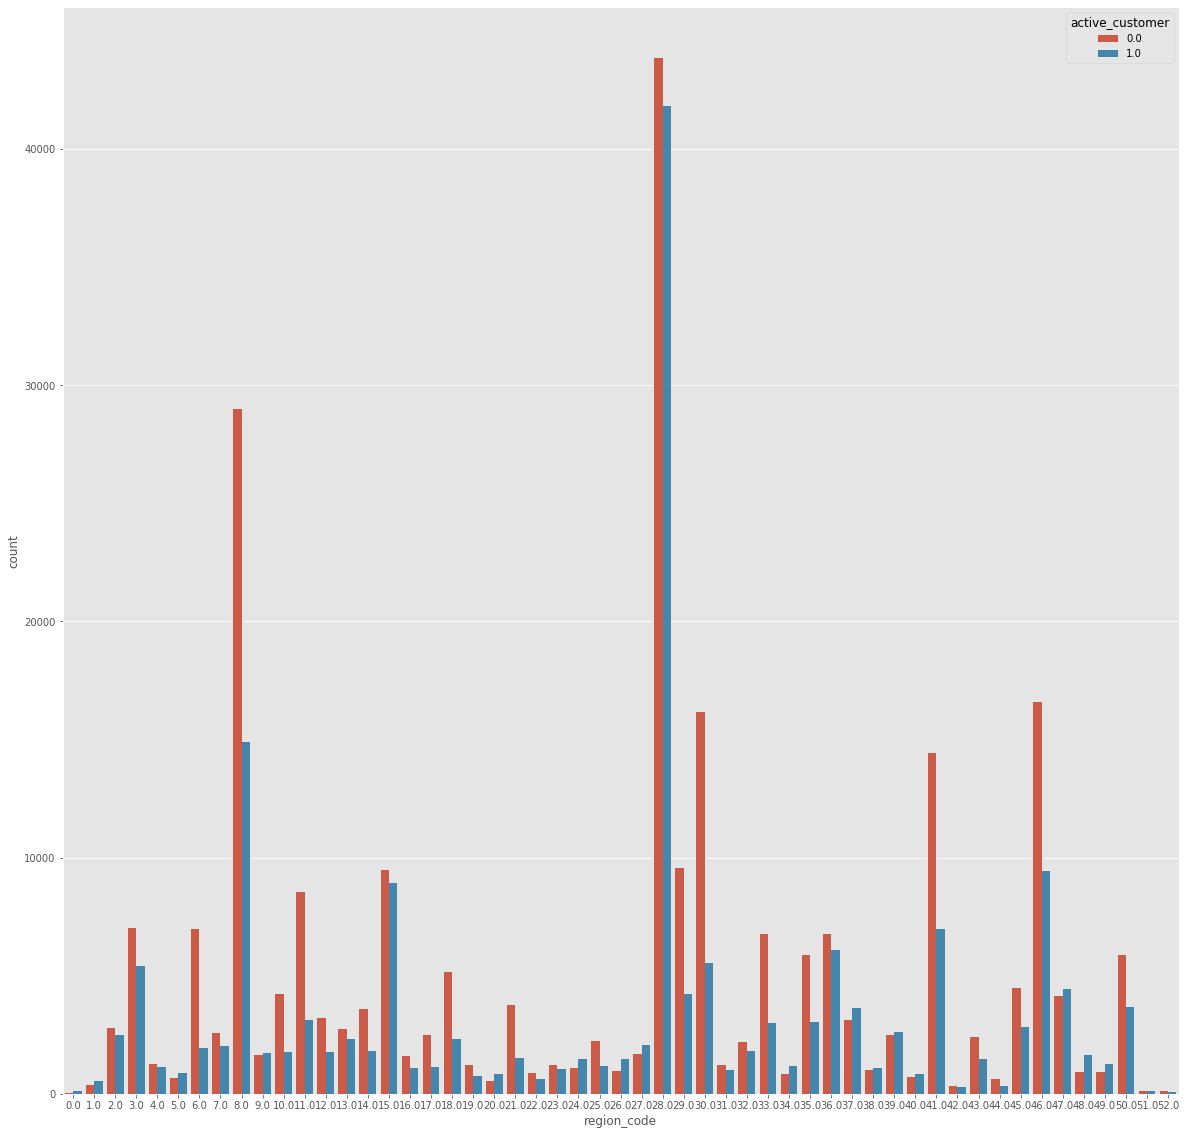

In [32]:

plt.figure(figsize=(20,20))
sns.countplot("region_code",hue="active_customer", data=df)

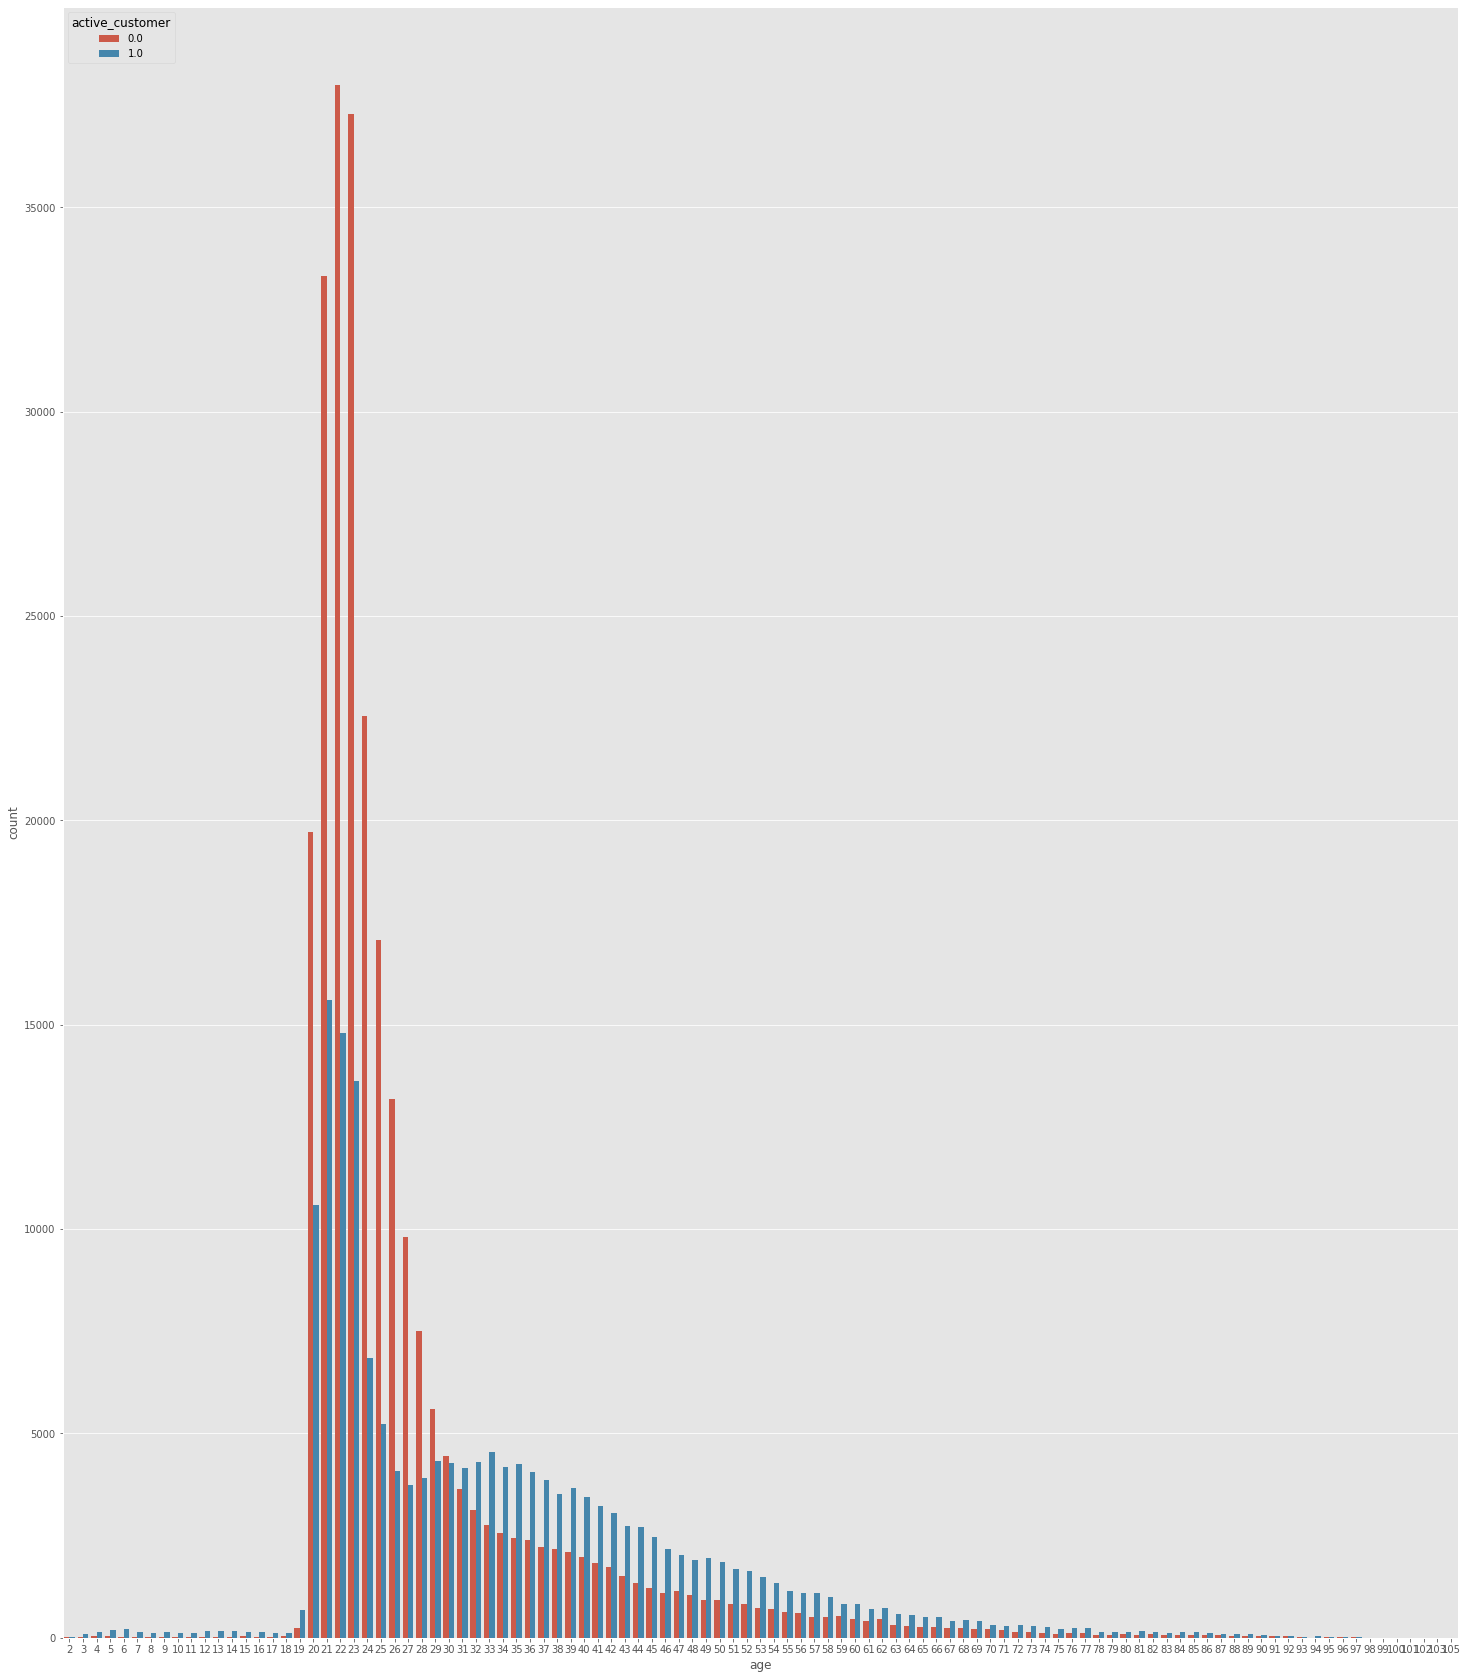

In [33]:
plt.figure(figsize=(25,30))
sns.countplot("age",hue="active_customer", data=df)

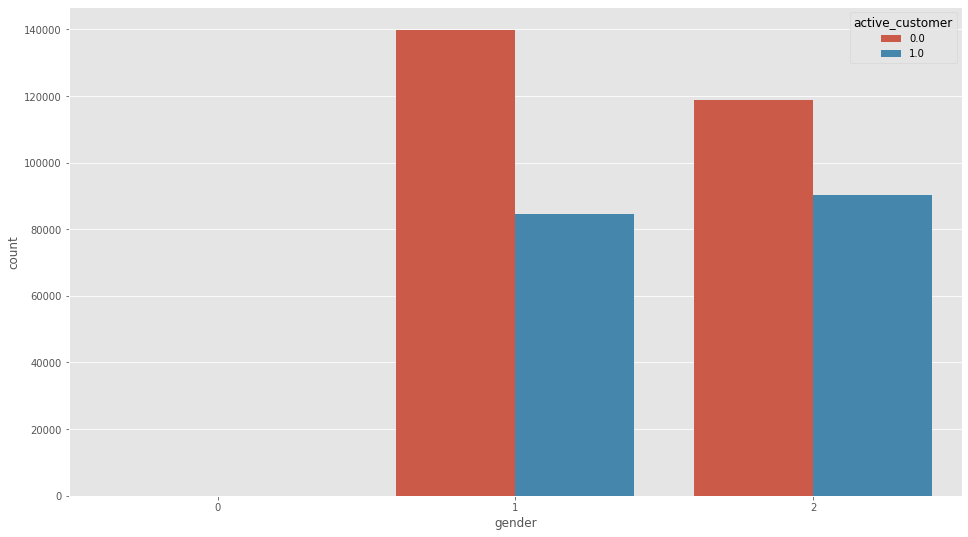

In [34]:
plt.figure(figsize=(16,9))
sns.countplot("gender",hue="active_customer", data=df)

In [35]:
df.head(20).T

,240364,165430,331302,203878,489975,363417,356164,476398,505150,196627,499288,252817,121726,77765,69275,419293,213043,479224,418972,255679
pk_cid,"1,193,666.00","1,186,146.00","1,031,706.00","1,095,766.00","1,062,104.00","1,412,576.00","1,112,333.00","1,005,226.00","1,036,043.00","1,197,631.00","1,127,090.00","1,249,531.00","1,401,158.00","1,240,588.00","1,208,207.00","1,253,531.00","1,318,204.00","1,439,292.00","1,298,676.00","1,356,835.00"
short_term_deposit,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
loans,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mortgage,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
funds,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
securities,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
long_term_deposit,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
credit_card,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
payroll,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
pension_plan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00


In [36]:
df.isnull().sum()

pk_cid                        0
short_term_deposit            0
loans                         0
mortgage                      0
funds                         0
securities                    0
long_term_deposit             0
credit_card                   0
payroll                       0
pension_plan                  0
payroll_account               0
emc_account                   0
debit_card                    0
em_account_p                  0
em_acount                     0
region_code                   0
gender                        0
age                           0
deceased                      0
salary                        0
entry_channel_KHE             0
entry_channel_KFC             0
entry_channel_KHQ             0
entry_channel_KAT             0
entry_channel_KHK             0
entry_channel_KHM             0
entry_channel_KHN             0
entry_channel_KFA             0
entry_channel_KHD             0
entry_channel_RED             0
entry_channel_KHL             0
entry_ch

In [37]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433500 entries, 240364 to 68225
Data columns (total 70 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   pk_cid                      433500 non-null  int64  
 1   short_term_deposit          433500 non-null  int64  
 2   loans                       433500 non-null  int64  
 3   mortgage                    433500 non-null  int64  
 4   funds                       433500 non-null  int64  
 5   securities                  433500 non-null  int64  
 6   long_term_deposit           433500 non-null  int64  
 7   credit_card                 433500 non-null  int64  
 8   payroll                     433500 non-null  float64
 9   pension_plan                433500 non-null  float64
 10  payroll_account             433500 non-null  int64  
 11  emc_account                 433500 non-null  int64  
 12  debit_card                  433500 non-null  int64  
 13  em_account

In [38]:
df=pd.read_csv('C:/Users/evive/Downloads/Nico y Juan/easyMoney/df_banc_rev.csv')

In [39]:
df= df.sample(n=600000, random_state=42)

In [40]:
df['entry_date'] = pd.to_datetime(df['entry_date'])
df['Day_entry_date'] = df['entry_date'].dt.day
df['Year_entry_date'] = df['entry_date'].dt.year
df['Month_entry_date'] = df['entry_date'].dt.month

In [41]:
df['pk_partition'] = pd.to_datetime(df['pk_partition'])
df['Day_pk_partition'] = df['pk_partition'].dt.day
df['Year_pk_partition'] = df['pk_partition'].dt.year
df['Month_pk_partition'] = df['pk_partition'].dt.month

In [42]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [43]:
df.drop('entry_date', inplace=True, axis=1)

In [44]:
df.drop('pk_partition', inplace=True, axis=1)

In [45]:
churn_features = cat_features+num_features

In [46]:
print("El porcentaje de muestras negativas es %f" % (sum(df['active_customer'] == 0) / df.shape[0]))

El porcentaje de muestras negativas es 0.596158


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import graphviz


In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

seed = 42
cand_models = { 'SGD': {'clf': SGDClassifier(random_state=seed, max_iter=5),
                        'params': [{'max_iter': [50, 100, 1000], 'tol': [1e-3, 1e-4]}]},
                'Logistic regression': 
                       {'clf': LogisticRegression(random_state=seed),
                        'params': [{'tol': [0.001,0.0001,0.00001], 'C': np.linspace(0.0001,1.0,5)}]},
                'Decision tree': 
                       {'clf': DecisionTreeClassifier(random_state=seed),
                        'params': [{'max_depth': [None, 3, 5, 7]}]},
                'Random forest': 
                        {'clf': RandomForestClassifier(random_state=seed),
                        'params': [{'n_estimators': [10, 20, 50, 100], 'max_depth': [None, 3, 5, 7]}]}
                }

# Muestra los datos correspondientes a una entrada
print("Modelo: ", cand_models['Logistic regression']['clf'])
print("\nParámetros: ", cand_models['Logistic regression']['params'])

Modelo:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Parámetros:  [{'tol': [0.001, 0.0001, 1e-05], 'C': array([1.00000e-04, 2.50075e-01, 5.00050e-01, 7.50025e-01, 1.00000e+00])}]


In [61]:
import time
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


t0 = time.time()
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train,y_train)
y_pred = lgbm_model.predict(X_test)
proba = lgbm_model.predict_proba(X_test)
roc_score = roc_auc_score(y_test, proba[:,1])
cv_score = cross_val_score(lgbm_model,X_train,y_train,cv=10).mean()
score = accuracy_score(y_test,y_pred)
bin_clf_rep = classification_report(y_test,y_pred, zero_division=1)


print("Accuracy :", score)
print("CV Score :", cv_score)
print("AUC Score : ", roc_score)
print(bin_clf_rep)
print(confusion_matrix(y_test,y_pred))
print("Time Taken :", time.time()-t0, "seconds")
lgbm_model

Accuracy : 0.8253856209150326
CV Score : 0.8259584775086506
AUC Score :  0.9012531674961127
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86     45617
         1.0       0.84      0.70      0.77     30883

    accuracy                           0.83     76500
   macro avg       0.83      0.81      0.81     76500
weighted avg       0.83      0.83      0.82     76500

[[41398  4219]
 [ 9139 21744]]
Time Taken : 105.93770575523376 seconds


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

In [71]:
models = [
          XGBClassifier()
          
         ]

In [72]:
for model in models:
    t0 = time.time()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    proba = model.predict_proba(X_test)
    roc_score = roc_auc_score(y_test, proba[:,1])
    cv_score = cross_val_score(model,X_train,y_train,cv=10).mean()
    score = accuracy_score(y_test,y_pred)
    bin_clf_rep = classification_report(y_test,y_pred, zero_division=1)
    name = str(model)
    print(name[0:name.find("(")])
    print("Accuracy :", score)
    print("CV Score :", cv_score)
    print("AUC Score : ", roc_score)
    print(bin_clf_rep)
    print(confusion_matrix(y_test,y_pred))
    print("Time Taken :", time.time()-t0, "seconds")
    print("------------------------------------------------------------")

XGBClassifier
Accuracy : 0.8292026143790849
CV Score : 0.8296239907727797
AUC Score :  0.906090092384974
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86     45617
         1.0       0.84      0.71      0.77     30883

    accuracy                           0.83     76500
   macro avg       0.83      0.81      0.82     76500
weighted avg       0.83      0.83      0.83     76500

[[41520  4097]
 [ 8969 21914]]
Time Taken : 1498.5526826381683 seconds
------------------------------------------------------------


In [79]:
models = [
          LogisticRegression(solver = "liblinear"),
          DecisionTreeClassifier(),
          RandomForestClassifier(n_estimators =10),
          XGBClassifier(),
          GradientBoostingClassifier(),
          LGBMClassifier()
          
         ]

In [80]:
for model in models:
    t0 = time.time()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    proba = model.predict_proba(X_test)
    roc_score = roc_auc_score(y_test, proba[:,1])
    cv_score = cross_val_score(model,X_train,y_train,cv=10).mean()
    score = accuracy_score(y_test,y_pred)
    bin_clf_rep = classification_report(y_test,y_pred, zero_division=1)
    name = str(model)
    print(name[0:name.find("(")])
    print("Accuracy :", score)
    print("CV Score :", cv_score)
    print("AUC Score : ", roc_score)
    print(bin_clf_rep)
    print(confusion_matrix(y_test,y_pred))
    print("Time Taken :", time.time()-t0, "seconds")
    print("------------------------------------------------------------")

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').